<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Logistic_Regression_for_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Import Packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score
import seaborn as sns
%matplotlib inline


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [8]:
df=pd.read_csv("Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,Male,0.0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No
1,8992-CEUEN,Female,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
2,9318-NKNFC,Male,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes
3,9975-SKRNR,Male,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No
4,1423-BMPBQ,Female,0.0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No


In [10]:
# To print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [13]:
# Exploring the Dataset
df.shape
df.size
df.tail(5)

(7032, 21)

147672

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,8879-XUAHX,Male,0.0,Yes,No,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
7028,9788-HNGUT,Male,0.0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
7029,9739-JLPQJ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
7030,7569-NMZYQ,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
7031,2889-FPWRM,Male,0.0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes


In [18]:
# Checking for the missing values in the dataset
pd.isnull(df).any()
pd.isnull(df).sum()
df.info()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   float64
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
# Finding out the number of customers churned v.s. not churned
print('count of labels')
df.groupby("Churn").size()

count of labels


Churn
No     5163
Yes    1869
dtype: int64

In [22]:
# Converting Churn from (Yes,No) To (1,0)
df.Churn[df.Churn == 'Yes'] = 1
df.Churn[df.Churn == 'No'] = 0
print(df) 

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     2967-MXRAV    Male            0.0  ...          18.80        18.80      0
1     8992-CEUEN  Female            0.0  ...          18.85        18.85      0
2     9318-NKNFC    Male            0.0  ...          18.85        18.85      1
3     9975-SKRNR    Male            0.0  ...          18.90        18.90      0
4     1423-BMPBQ  Female            0.0  ...          19.00        19.00      0
...          ...     ...            ...  ...            ...          ...    ...
7027  8879-XUAHX    Male            0.0  ...         116.25      8564.75      0
7028  9788-HNGUT    Male            0.0  ...         116.95      8594.40      0
7029  9739-JLPQJ  Female            0.0  ...         117.50      8670.10      0
7030  7569-NMZYQ  Female            0.0  ...         118.75      8672.45      0
7031  2889-FPWRM    Male            0.0  ...         117.80      8684.80      1

[7032 rows x 21 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Separating out independent categorical variable for conversion into Numerical
x_catg = df.loc[:,('gender','Partner','Dependents','PhoneService','MultipleLines','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod')]
x_catg.head()
x_catg.shape

,gender,Partner,Dependents,PhoneService,MultipleLines,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Male,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
2,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check
3,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
4,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


(7032, 15)

In [28]:
# Separating out Independent numerical variable
x_num = df.loc[:,('SeniorCitizen','MonthlyCharges','tenure','TotalCharges')]
x_num.head()
x_num.shape

,SeniorCitizen,MonthlyCharges,tenure,TotalCharges
0,0.0,18.80,1.0,18.80
1,0.0,18.85,1.0,18.85
2,0.0,18.85,1.0,18.85
3,0.0,18.90,1.0,18.90
4,0.0,19.00,1.0,19.00


(7032, 4)

In [29]:
# Converting categorical variable to Dummy coding
x_num1 = pd.get_dummies(x_catg)
x_num1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
4,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1


In [33]:
# Concatenating both the x_num1 and x_num
x = pd.concat([x_num1,x_num],axis=1)
x.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,MonthlyCharges,tenure,TotalCharges
0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0.0,18.80,1.0,18.80
1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0.0,18.85,1.0,18.85
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0.0,18.85,1.0,18.85
3,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0.0,18.90,1.0,18.90
4,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0.0,19.00,1.0,19.00


In [73]:
# Creating dependent variable
y = df['Churn']
y.head()
y=df['Churn'].astype(int)
y

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: object

0       0
1       0
2       1
3       0
4       0
       ..
7027    0
7028    0
7029    0
7030    0
7031    1
Name: Churn, Length: 7032, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
logreg.coef_

array([[-8.49598002e-02, -1.06259838e-01, -1.57914060e-01,
        -3.33055781e-02,  5.53944236e-03, -1.96759081e-01,
         1.05943813e-02, -2.01814020e-01, -1.87662112e-01,
         1.05943813e-02, -1.41519079e-02, -1.87662112e-01,
         1.05943813e-02, -1.41519079e-02,  2.46882703e-01,
        -7.56428852e-02, -3.62459456e-01,  1.26968409e-04,
        -7.56428852e-02, -1.15703722e-01, -5.81463013e-02,
        -7.56428852e-02, -5.74304519e-02,  2.00157957e-01,
        -7.56428852e-02, -3.15734710e-01, -1.60383891e-01,
        -7.56428852e-02,  4.48071382e-02, -1.22398395e-01,
        -7.56428852e-02,  6.82164137e-03,  3.63160933e-01,
        -2.36641111e-01, -3.17739461e-01, -3.29422717e-01,
         1.38203079e-01, -6.33161407e-02, -2.02177777e-01,
         2.85635940e-01, -2.11361661e-01,  1.86233586e-01,
         1.21333662e-02, -6.86782574e-02,  3.35946692e-04]])

In [85]:
# Finding out key predictor of "Churn"
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(logreg.coef_))],axis=1)
coeff.columns = ("Variables","Coeff")
coeff.sort_values('Variables', ascending = True)

,Variables,Coeff
32,Contract_Month-to-month,0.363161
33,Contract_One year,-0.236641
34,Contract_Two year,-0.317739
4,Dependents_No,0.005539
5,Dependents_Yes,-0.196759
20,DeviceProtection_No,-0.058146
21,DeviceProtection_No internet service,-0.075643
22,DeviceProtection_Yes,-0.057430
42,MonthlyCharges,0.012133
8,MultipleLines_No,-0.187662


In [86]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


Confusion Matrix


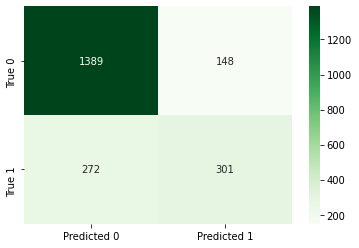

In [89]:
print('Confusion Matrix')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
lab1=["Predicted 0","Predicted 1"]
lab2=["True 0","True 1"]
sns.heatmap(confusion_matrix, annot=True, cmap="Greens",fmt="d", xticklabels=lab1, yticklabels=lab2)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1537
           1       0.67      0.53      0.59       573

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

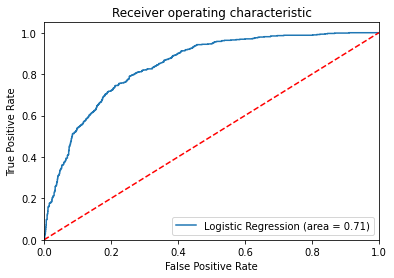

In [93]:
# ROC Curve
import matplotlib.pyplot as plt 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()